In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as py
from google.colab import files
import io
uploaded = files.upload()

Saving User_Data.csv to User_Data.csv


In [90]:
df = pd.read_csv(io.BytesIO(uploaded['User_Data.csv']))
df.head(20)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [6]:
df['Purchased'].value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [8]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [33]:
fig = px.scatter(df, x="Age", y="EstimatedSalary", color="Purchased")
fig.update_layout(height = 500, width = 800)
fig.show()

In [34]:
fig =px.histogram(df, x = 'EstimatedSalary', color = 'Purchased')
fig.update_layout(height = 500, width = 800)
fig.show()

In [91]:
#label encode gender
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


<Axes: >

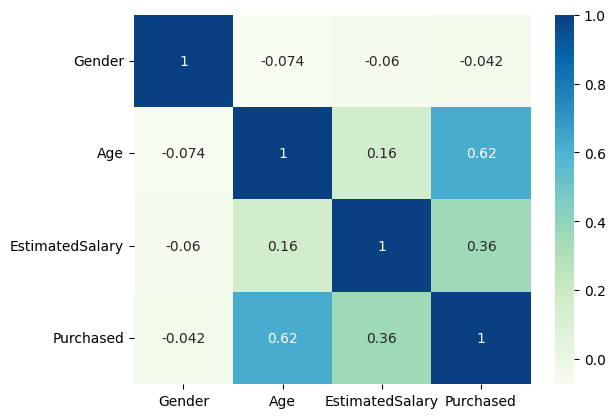

In [92]:
df1 = df.drop(['User ID'], axis = 1)
corr = df1.corr()
# fig = go.Figure(data = go.Heatmap(z = corr.values, x = corr.columns.values, y = corr.columns.values, showscale = True))
# fig.update_layout(height = 500, width = 800)
# fig.show()
sns.heatmap(corr, annot = True, cmap = 'GnBu')

In [100]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

X = df1.drop(['Purchased'], axis = 1)
Y = df['Purchased']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state =100)

In [101]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [103]:
model = LogisticRegression(random_state=0)
model.fit(X_train,Y_train)

LogisticRegression(random_state=0)

In [104]:
y_pred_train = model.predict(X_train)
model.score(X_train, Y_train)

0.8464285714285714

In [105]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print(classification_report(Y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.85      0.92      0.89       182
           1       0.83      0.70      0.76        98

    accuracy                           0.85       280
   macro avg       0.84      0.81      0.82       280
weighted avg       0.85      0.85      0.84       280



In [106]:
accuracy_score(Y_train, y_pred_train)

0.8464285714285714

In [107]:
accuracy_score(Y_test, model.predict(X_test))

0.8333333333333334